# Waste Classifications

#### Library Import

In [1]:
import os
import keras
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import image_dataset_from_directory

#### Images Directories

In [3]:
waste_type_dir = []
for (root, dir, files) in os.walk('../1_RawData'):
    if root.split('\\')[-3:-1] == ['../1_RawData', 'images']:
        waste_type_dir.append(root)
waste_type_dir.sort()
waste_type_dir

['../1_RawData\\images\\aerosol_cans',
 '../1_RawData\\images\\aluminum_food_cans',
 '../1_RawData\\images\\aluminum_soda_cans',
 '../1_RawData\\images\\cardboard_boxes',
 '../1_RawData\\images\\cardboard_packaging',
 '../1_RawData\\images\\clothing',
 '../1_RawData\\images\\coffee_grounds',
 '../1_RawData\\images\\disposable_plastic_cutlery',
 '../1_RawData\\images\\eggshells',
 '../1_RawData\\images\\food_waste',
 '../1_RawData\\images\\glass_beverage_bottles',
 '../1_RawData\\images\\glass_cosmetic_containers',
 '../1_RawData\\images\\glass_food_jars',
 '../1_RawData\\images\\magazines',
 '../1_RawData\\images\\newspaper',
 '../1_RawData\\images\\office_paper',
 '../1_RawData\\images\\paper_cups',
 '../1_RawData\\images\\plastic_cup_lids',
 '../1_RawData\\images\\plastic_detergent_bottles',
 '../1_RawData\\images\\plastic_food_containers',
 '../1_RawData\\images\\plastic_shopping_bags',
 '../1_RawData\\images\\plastic_soda_bottles',
 '../1_RawData\\images\\plastic_straws',
 '../1_Ra

#### Data Anlysis

In [4]:
num_images_dict = {'waste_category': [x.split('\\')[-1] for x in waste_type_dir],
             'num_images': [(len(os.listdir(x + '/default')) + len(os.listdir(x + '/real_world'))) for x in waste_type_dir],
             'num_default_images': [len(os.listdir(x + '/default')) for x in waste_type_dir],
             'num_real_world_images': [len(os.listdir(x + '/real_world')) for x in waste_type_dir]}

num_images_df = pd.DataFrame.from_dict(num_images_dict)
num_images_df

,waste_category,num_images,num_default_images,num_real_world_images
0,aerosol_cans,500,250,250
1,aluminum_food_cans,500,250,250
2,aluminum_soda_cans,500,250,250
3,cardboard_boxes,500,250,250
4,cardboard_packaging,500,250,250
5,clothing,500,250,250
6,coffee_grounds,500,250,250
7,disposable_plastic_cutlery,500,250,250
8,eggshells,500,250,250
9,food_waste,500,250,250


#### Image Analysis

In [5]:
fig = plt.figure('..\\1_RawData\\images\\aerosol_cans\\default\\Image_1.png')
size = fig.get_size_inches()*fig.dpi
size

array([640., 480.])

<Figure size 640x480 with 0 Axes>

#### Prepared Data Directories

In [2]:
# Prepared Data directory
train_dir = '..\\2_PreparedData\\training_images\\'
valid_dir = '..\\2_PreparedData\\validation_images\\'
test_dir = '..\\2_PreparedData\\test_images\\'

In [8]:
def check_sum (directory):
    """Function to determine numbers of files in a folder

    Args:
        directory (string): Directory to check (full path)

    Returns:
        int: Total Number of files
    """
    som = 0
    for (root, dir, files) in os.walk(directory):
        som += len(files)
    return print(som)

In [6]:
# Directory creation per classes
for dir in waste_type_dir:
    os.makedirs(train_dir + dir.split('\\')[-1], exist_ok=True)
    os.makedirs(valid_dir + dir.split('\\')[-1], exist_ok=True)
    os.makedirs(test_dir + dir.split('\\')[-1], exist_ok=True)

In [7]:
# Copy images from the raw directory to prepared directory
if check_sum (train_dir) != 15000:
    for (root, dir, files) in os.walk('../1_RawData'):
        if root.split('\\')[-1] == 'default' or root.split('\\')[-1] == 'real_world':
            for file in files :
                shutil.copy(root + '\\' + file, train_dir + root.split('\\')[-2] + '\\' + file.split('.')[0] + '_' + root.split('\\')[-1] + '.png')

print('Copied')

Copied


In [9]:
check_sum(train_dir)

15000


In [10]:
# Run only if you want to change images in validation and test directory
for (root, dir, files) in os.walk('../2_PreparedData'):
    if root.split('\\')[-3:-1] == ['../2_PreparedData', 'validation_images'] :
        for file in files:
            os.remove(root + '\\' + file)
    if root.split('\\')[-3:-1] == ['../2_PreparedData', 'test_images'] :
        for file in files:
            os.remove(root + '\\' + file)            

In [11]:
# Move 100 images per classes in validation directory
for (root, dir, files) in os.walk('../2_PreparedData'):
    if root.split('\\')[-3:-1] == ['../2_PreparedData', 'training_images'] :
        for file in np.random.choice(files, size=100, replace=False):
            shutil.move(root + '\\' + file, valid_dir + root.split('\\')[-1])

In [12]:
check_sum(valid_dir)

3000


In [13]:
# Move 10 images per classes in test directory
for (root, dir, files) in os.walk('../2_PreparedData'):
    if root.split('\\')[-3:-1] == ['../2_PreparedData', 'training_images'] :
        for file in np.random.choice(files, size=10, replace=False):
            shutil.move(root + '\\' + file, test_dir + root.split('\\')[-1])

In [14]:
check_sum(test_dir)

300


#### Dataset Creation

La fonction prefetch permet d'optimiser l'utilisation des ressources mémoire. On l'utilise avec l'autotune qui permet de parallélisé les tâches dans le même objectif d'optimisation.

Prefetch fonction is use to optimise memory ressources. I use it with with autotune for parralelisme task

In [3]:
# Training Dataset
train_set = image_dataset_from_directory(directory = train_dir,
                                         label_mode = 'categorical',
                                         image_size = (256, 256),
                                         batch_size =64,
                                         seed = 64)
train_set = train_set.cache().prefetch(tf.data.AUTOTUNE)

Found 11700 files belonging to 30 classes.


In [4]:
# Validation Dataset
valid_set = image_dataset_from_directory(directory = valid_dir,
                                         label_mode = 'categorical',
                                         image_size = (256, 256),
                                         batch_size =64,
                                         seed = 64)
valid_set = valid_set.cache().prefetch(tf.data.AUTOTUNE)

Found 3000 files belonging to 30 classes.


In [5]:
# Test Dataset
test_set = image_dataset_from_directory(directory = test_dir,
                                         label_mode = 'categorical',
                                         image_size = (256, 256),
                                         batch_size =64,
                                         seed = 64)
test_classes = test_set.class_names
test_set = test_set.cache().prefetch(tf.data.AUTOTUNE)

Found 300 files belonging to 30 classes.


#### Model Creation

Related the link bellow, the best model for image classification is EfficientNetV2L. It's small and fast, so I decide to use it for this project
https://keras.io/api/applications/#usage-examples-for-image-classification-models  
Futhermore, I had made the last 10 layers trainable to fine-tun the model

In [6]:
netV2_model = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    input_shape=(256, 256, 3),
    pooling='avg'
)
# Enable trainable layers
for layer in netV2_model.layers[:-12]:
    layer.trainable=False

In [7]:
# Checking trainable layers
print(len(netV2_model.trainable_weights))

10


In [13]:
# Checking output shape
print(netV2_model.output_shape[1])

1280


To robust the training, I add some layer. First, add a layer to modifiate image with flip, rotation and zoom. All of this in a random state with a maximun of 20% of modification.  
Second, after the net model, I had two dense layers. The first one with a Relu activation and a dimension in the middle of the net model and wath we need at the end for the 30 classes. The last one is the Dense layer with a softmax activation to have a great repartition between the 30 classes.

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(-0.2, 0.2)
])

inputs = tf.keras.layers.Input(shape=(None, None, 3))
x = data_augmentation(inputs)
x = netV2_model(x)
inter = tf.keras.layers.Dense((netV2_model.output_shape[1]-len(test_classes))/2,
                        activation='relu',
                        name='inter_layer')(x)
outputs = tf.keras.layers.Dense(len(test_classes),
                        activation='softmax',
                        name='output_layer')(inter)
model = tf.keras.Model(inputs, outputs)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 inter_layer (Dense)         (None, 625)               800625    
                                                                 
 output_layer (Dense)        (None, 30)                18780     
                                                                 
Total params: 118,566,253
Trainable params: 5,332,845
Non-trainable params: 113,233,408
_______________________________________

In [8]:
# Earlystop callbacks preserving the best epoch
earlystop = tf.keras.callbacks.EarlyStopping(
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode='min',
    restore_best_weights=True,
)

In [9]:
# Fit the model
history = model.fit(train_set,
                    validation_data=valid_set,
                    epochs=20,
                    verbose=1,
                    callbacks=[earlystop])

Epoch 1/20
183/183 [==============================] - 327s 2s/step - loss: 1.0004 - accuracy: 0.6967 - val_loss: 0.5800 - val_accuracy: 0.8057
Epoch 2/20
183/183 [==============================] - 248s 1s/step - loss: 0.5593 - accuracy: 0.8079 - val_loss: 0.5319 - val_accuracy: 0.8243
Epoch 3/20
183/183 [==============================] - 229s 1s/step - loss: 0.4425 - accuracy: 0.8455 - val_loss: 0.5147 - val_accuracy: 0.8240
Epoch 4/20
183/183 [==============================] - 224s 1s/step - loss: 0.3670 - accuracy: 0.8705 - val_loss: 0.5159 - val_accuracy: 0.8343
Epoch 5/20
183/183 [==============================] - 232s 1s/step - loss: 0.3101 - accuracy: 0.8874 - val_loss: 0.4947 - val_accuracy: 0.8413
Epoch 6/20
183/183 [==============================] - 236s 1s/step - loss: 0.2849 - accuracy: 0.8974 - val_loss: 0.4936 - val_accuracy: 0.8437
Epoch 7/20
183/183 [==============================] - 227s 1s/step - loss: 0.2504 - accuracy: 0.9069 - val_loss: 0.4801 - val_accuracy: 0.8457

#### Results Analysis

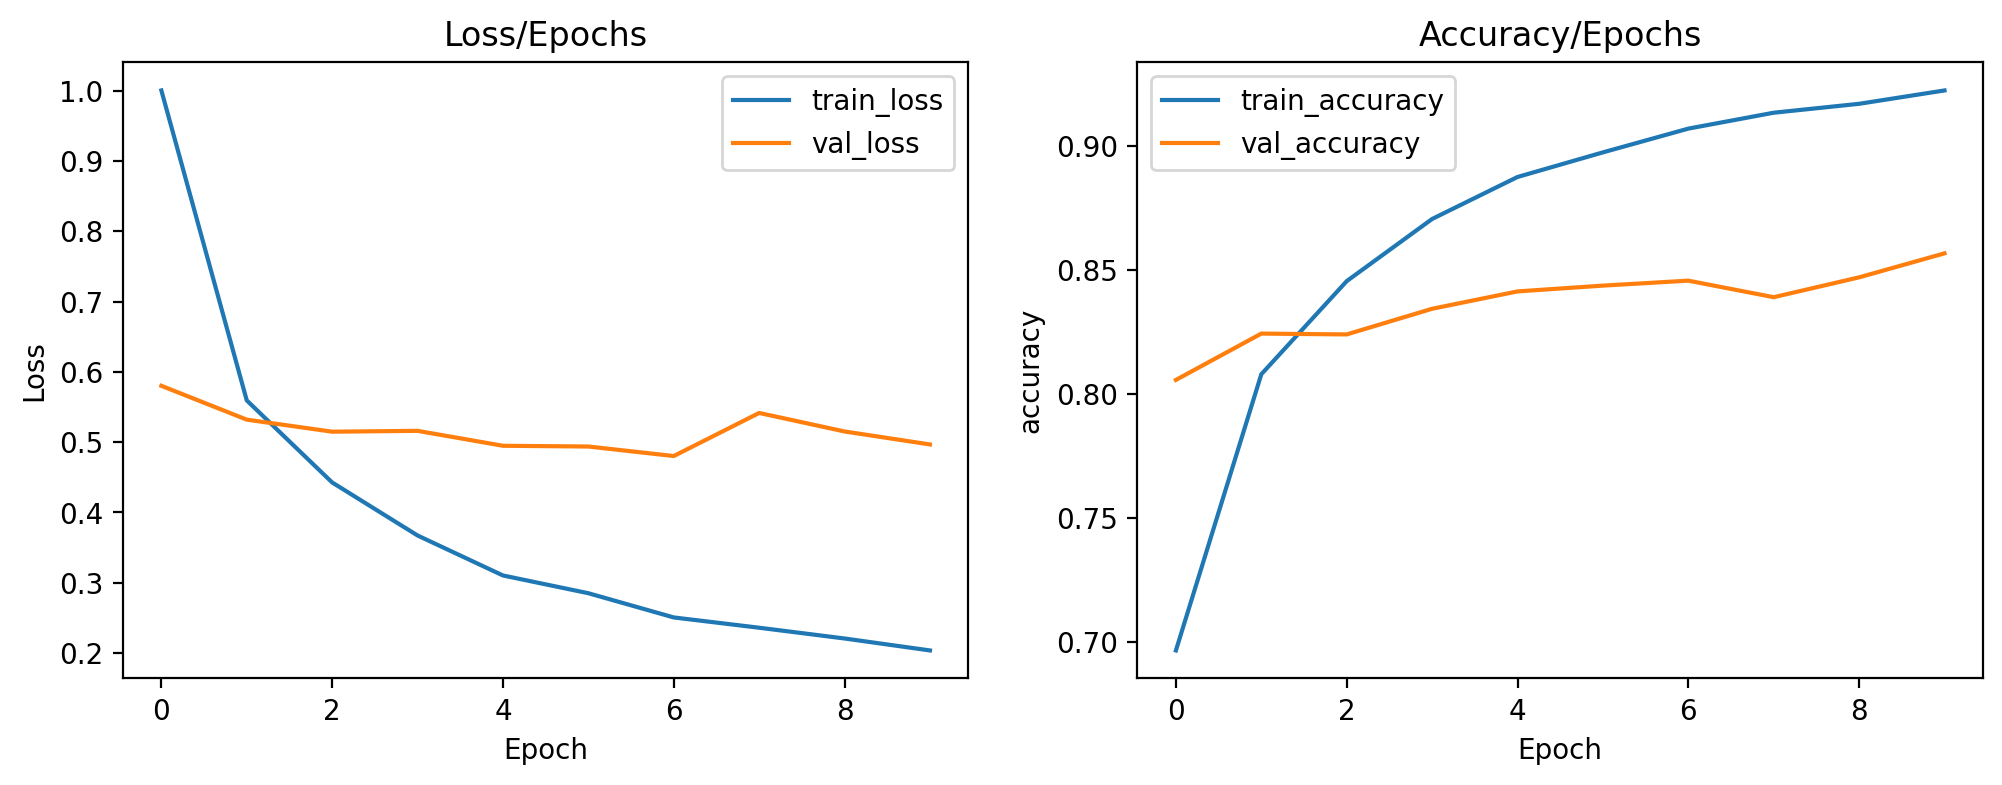

In [10]:
# Plot training and validation evolution
plt.figure(figsize=(12, 4), dpi=200)
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss/Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy/Epochs')

plt.show()

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Model Loss : {round(loss, 4)}.")
print(f"Model Accuracy : {round(accuracy, 2)*100}%.")

5/5 [==============================] - 6s 357ms/step - loss: 0.5089 - accuracy: 0.8500
Model Loss : 0.5089.
Model Accuracy : 85.0%.


1/1 [==============================] - 5s 5s/step


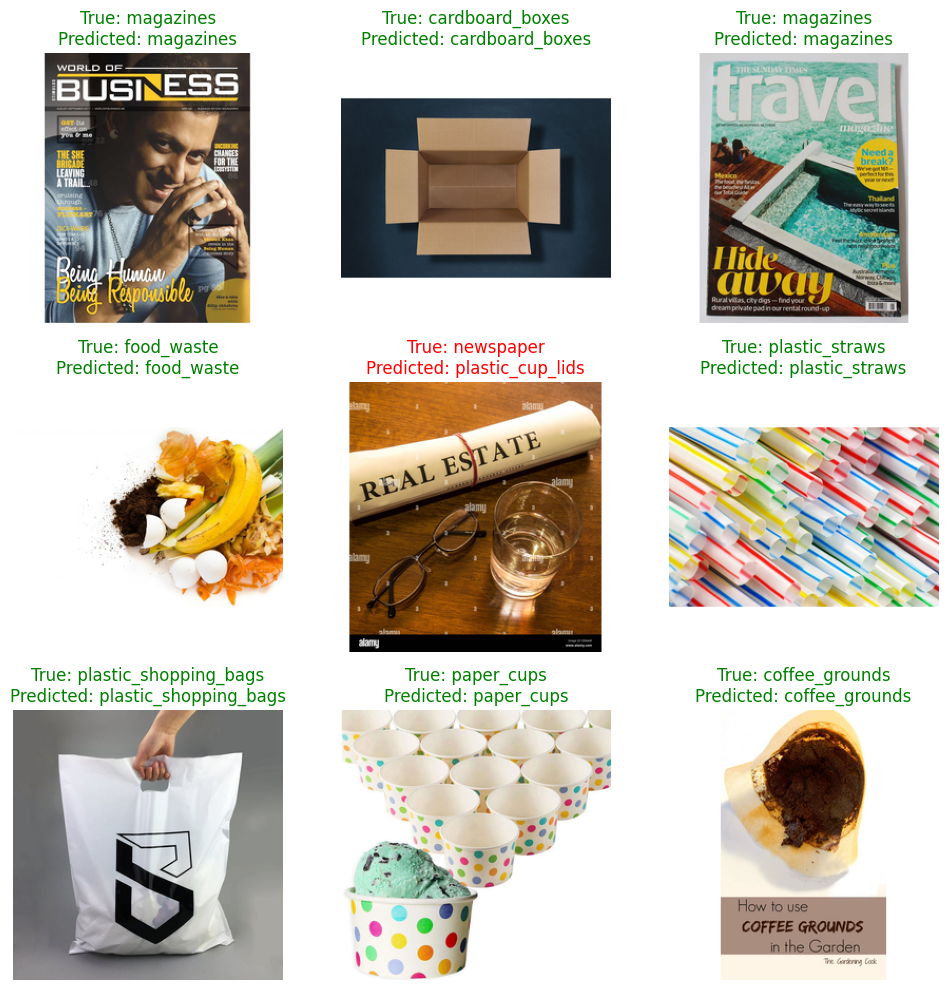

In [12]:
def prediction_display(dataset, model, test_classes, num_images=9):
    """Display images from a dataset with their label. Also display the predict label and use a concording color if prediction is
       True (green) or False (red)

    Args:
        dataset (dataset): dataset wich you want to test images
        model (model): model you fit previously on your training data
        test_classes (list): list of classes names from the dataset use
        num_images (int, optional): number of images you want to display. Defaults to 9.
    """
    plt.figure(figsize=(10, 10))

    # Take a batch from the dataset and select random images
    for images, labels in dataset.take(1):
        indices = np.random.choice(images.shape[0], num_images, replace=False)
        random_images = images.numpy()[indices]
        true_labels = labels.numpy()[indices]
        
        # Convert true labels to integer indices if they are one-hot encoded
        if len(true_labels.shape) > 1:
            true_labels = np.argmax(true_labels, axis=1)

        predictions = model.predict(random_images)
        predicted_labels = np.argmax(predictions, axis=1)

        for i in range(num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(random_images[i].astype("uint8"))
            if true_labels[i] == predicted_labels[i]:
                color = 'green'
            else:
                color = 'red'
            plt.title(f"True: {test_classes[true_labels[i]]}\nPredicted: {test_classes[predicted_labels[i]]}",
                      color=color)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

prediction_display(test_set, model, test_classes)